In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
import pickle
import os
import time
import datetime
from matplotlib import patches
import multi_tracker_analysis as mta
import scipy.stats
import figurefirst as fifi
import pandas
import copy
import matplotlib.patches as mpatches

from numpy import random, histogram2d, diff
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d

import statsmodels.api as sm
import statsmodels.formula.api as smf
import load_data
import flystat

/home/caveman/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


1.5.1
recommended version: 1.1.1 or greater


/home/caveman/.local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Are the first visits longer?

In [60]:
only_flies_that_approached_odor = True

df = load_data.load_data()
if only_flies_that_approached_odor:
    df = df.query("approached_odor == 1")


In [61]:
distance_travelled_first_visits = []
for flid in df.flid.unique():
    dfq = df.query('flid == ' + str(flid))
    if len(dfq) > 1:
        distance_travelled_first_visits.append(dfq.distance_travelled.values[0])

In [62]:
null_dist = []

for i in range(1000):
    distance_travelled_subsequent_visits = []
    for flid in df.flid.unique():
        dfq = df.query('flid == ' + str(flid))
        if len(dfq) > 1:
            distance_travelled_subsequent_visits.append( np.random.choice(dfq.distance_travelled.values[0:]) )
    null_dist.append(np.mean(distance_travelled_subsequent_visits))

In [63]:
true = np.mean(distance_travelled_first_visits)

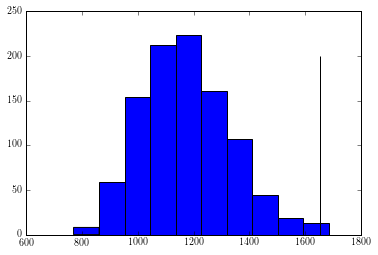

In [64]:
plt.hist(null_dist)
plt.vlines(true, 0, 200)

In [65]:
null_dist = np.sort(null_dist)

In [66]:
ix = np.argmin( np.abs(null_dist-true) )
print('one-tailed p-value:')
print((1000 - ix)/1000.)

one-tailed p-value:
0.005


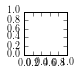

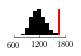

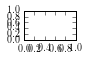

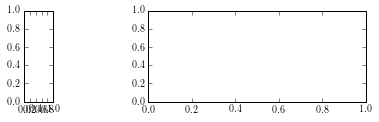

In [70]:
fififig = 'figures/foraging_fig_1.svg'
layout = fifi.svg_to_axes.FigureLayout(fififig, autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])
ax = layout.axes[('bootstrapped_approached', 'bootstrapped_approached')]

v,b,p = ax.hist(null_dist, edgecolor='none', facecolor='black')
ax.vlines(true, 0, np.max(v), color='red', linewidths=2)

fifi.mpl_functions.adjust_spines(ax, ['bottom'], 
                                 xticks = [600, 1200, 1800],
                                 linewidth=0.5, tick_length=2.5, 
                                 spine_locations={'left': 2.5, 'bottom': 2.5})
#ax.set_xticklabels([]) #['$0$', '$0.5$', '$1$'])
ax.minorticks_off()

#######

fifi.mpl_functions.set_fontsize(ax.figure, 8)
layout.append_figure_to_layer(layout.figures['bootstrapped_approached'], 'bootstrapped_approached', cleartarget=True)
layout.write_svg(fififig)

### All trajectories

In [71]:
only_flies_that_approached_odor = False

df = load_data.load_data()
if only_flies_that_approached_odor:
    df = df.query("approached_odor == 1")


In [72]:
distance_travelled_first_visits = []
for flid in df.flid.unique():
    dfq = df.query('flid == ' + str(flid))
    if len(dfq) > 1:
        distance_travelled_first_visits.append(dfq.distance_travelled.values[0])

In [73]:
null_dist = []

for i in range(1000):
    distance_travelled_subsequent_visits = []
    for flid in df.flid.unique():
        dfq = df.query('flid == ' + str(flid))
        if len(dfq) > 1:
            distance_travelled_subsequent_visits.append( np.random.choice(dfq.distance_travelled.values[0:]) )
    null_dist.append(np.mean(distance_travelled_subsequent_visits))

In [74]:
true = np.mean(distance_travelled_first_visits)

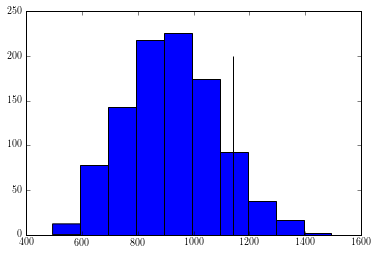

In [75]:
plt.hist(null_dist)
plt.vlines(true, 0, 200)

In [76]:
null_dist = np.sort(null_dist)

In [77]:
ix = np.argmin( np.abs(null_dist-true) )
print('one-tailed p-value:')
print((1000 - ix)/1000.)

one-tailed p-value:
0.081


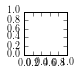

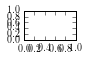

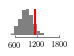

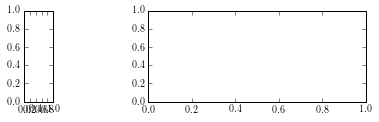

In [79]:
fififig = 'figures/foraging_fig_1.svg'
layout = fifi.svg_to_axes.FigureLayout(fififig, autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])
ax = layout.axes[('bootstrapped_all', 'bootstrapped_all')]

v,b,p = ax.hist(null_dist, edgecolor='none', facecolor='gray')
ax.vlines(true, 0, np.max(v), color='red', linewidths=2)

fifi.mpl_functions.adjust_spines(ax, ['bottom'], 
                                 xticks = [600, 1200, 1800],
                                 linewidth=0.5, tick_length=2.5, 
                                 spine_locations={'left': 2.5, 'bottom': 2.5})
#ax.set_xticklabels([]) #['$0$', '$0.5$', '$1$'])
ax.minorticks_off()

#######

fifi.mpl_functions.set_fontsize(ax.figure, 8)
layout.append_figure_to_layer(layout.figures['bootstrapped_all'], 'bootstrapped_all', cleartarget=True)
layout.write_svg(fififig)

In [3]:
def compare_first_visit_and_subsequent_visits_for_fly(log_df, flid, plot=False, 
                                                      nth_visit="first_approach", ax=None,
                                                      only_flies_that_approached_odor=True,
                                                      facecolor='black'):
    flid_1 = log_df.query("flid == " + str(flid))
    if only_flies_that_approached_odor:
        flid_1 = flid_1.query("approached_odor == 1")
    if len(flid_1) < 1:
        return np.nan
    
    if nth_visit == 'random':
        nth_visit = np.random.choice(flid_1.nth_visit.values)

    if nth_visit == 'first_approach':
        nth_visit = flid_1.nth_visit.values[0]
    
    m = flystat.resampling.bootstrap_medians_from_data(flid_1.distance_travelled.values, use='mean', iterations=1000)
    m = np.log(m)
    #m = flystat.resampling.bootstrap_medians_from_data(flid_1.query("nth_visit != " + str(nth_visit)).log_distance_travelled.values, use='mean', iterations=1000)
    first_visit = flid_1.query("nth_visit == " + str(nth_visit)).log_distance_travelled.values[0]
    
    
    
    # check if pval < 0.05, one-tailed
    m = np.sort(m)
    idx = np.argmin( np.abs(m-first_visit) )
    
    
    if plot:
        if ax is None:
            fig = plt.figure()
            ax = fig.add_subplot(111)
        v, b, p = ax.hist(m, edgecolor='none', facecolor=facecolor)
        
        if idx > (len(m) - 0.05*len(m)):
            color='red'
        else:
            color='teal'
        ax.vlines(first_visit, 0, np.max(v), color=color, linewidths=2)
    
    
    if idx > (len(m) - 0.05*len(m)):
        return True
    else:
        return False

### Flies that approached the odor

load_data.py:70: RuntimeWarning: divide by zero encountered in log
  log_df['log_' + col] = np.log(df[col])
load_data.py:70: RuntimeWarning: invalid value encountered in log
  log_df['log_' + col] = np.log(df[col])


('dropping flids: ', array([10]))


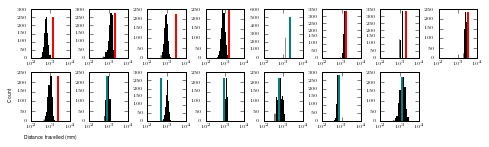

In [4]:
only_flies_that_approached_odor = True

log_df = load_data.load_data()
if only_flies_that_approached_odor:
    log_df = log_df.query("approached_odor == 1")
    
# drop flids with only one data point
r = (log_df.groupby("flid").count()==1).query("all_trajec_ids == True")
flids_with_too_little_data = r.index.values
print("dropping flids: ", flids_with_too_little_data)
log_df = log_df[~log_df['flid'].isin(flids_with_too_little_data)]

fig = plt.figure(figsize=(8,2))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
for i in range(len(log_df.flid.unique())):
    ax = fig.add_subplot(2,8,i+1)
    compare_first_visit_and_subsequent_visits_for_fly(log_df, log_df.flid.unique()[i], plot=True, 
                                                      ax=ax, 
                                                      only_flies_that_approached_odor=only_flies_that_approached_odor)
    if i==8:
        ax.set_ylabel("Count")
        ax.set_xlabel("Distance travelled (mm)")
        
    ax.set_xticks(np.log([100, 1000, 10000]))
    ax.set_xticklabels(['$10^2$', '$10^3$', '$10^4$'])
    
fifi.mpl_functions.set_fontsize(ax, 5)
fig.savefig('first_visit_stats_approached_odor.png', dpi=300)

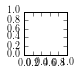

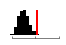

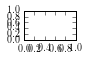

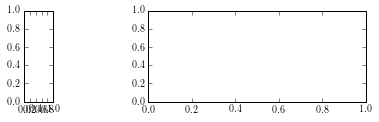

### All flies

('dropping flids: ', array([], dtype=int64))


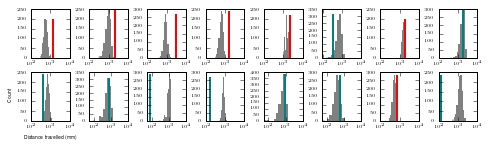

In [12]:
only_flies_that_approached_odor = False

log_df = load_data.load_data()
if only_flies_that_approached_odor:
    log_df = log_df.query("approached_odor == 1")
    
# drop flids with only one data point
r = (log_df.groupby("flid").count()==1).query("all_trajec_ids == True")
flids_with_too_little_data = r.index.values
print("dropping flids: ", flids_with_too_little_data)
log_df = log_df[~log_df['flid'].isin(flids_with_too_little_data)]

fig = plt.figure(figsize=(8,2))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
for i in range(len(log_df.flid.unique())):
    ax = fig.add_subplot(2,8,i+1)
    compare_first_visit_and_subsequent_visits_for_fly(log_df, log_df.flid.unique()[i], plot=True, 
                                                      ax=ax, 
                                                      facecolor='gray',
                                                      only_flies_that_approached_odor=only_flies_that_approached_odor)
    if i==8:
        ax.set_ylabel("Count")
        ax.set_xlabel("Distance travelled (mm)")
        
    ax.set_xticks(np.log([100, 1000, 10000]))
    ax.set_xticklabels(['$10^2$', '$10^3$', '$10^4$'])
    
fifi.mpl_functions.set_fontsize(ax, 5)
fig.savefig('first_visit_stats_all_flies.png', dpi=300)